# Experiments with data 

In [1]:
#imports
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [17]:
path = r'../data/raw/S01.set'
eeglab_raw = mne.io.read_raw_eeglab(path,verbose=True)
eeglab_raw.info

Reading /Users/filip/Workspace/bachelor-thesis/notebooks/../data/raw/S01.fdt


<Info | 8 non-empty values
 bads: []
 ch_names: O1, O2, T5, P3, Pz, P4, T6, T3, C3, Cz, C4, T4, F7, F3, Fz, F4, ...
 chs: 21 EEG
 custom_ref_applied: False
 dig: 21 items (21 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 21
 projs: []
 sfreq: 256.0 Hz
>

Using matplotlib as 2D backend.
Opening raw-browser...


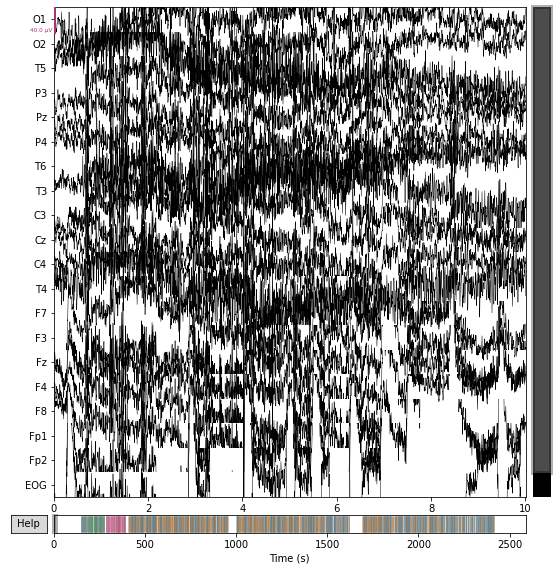

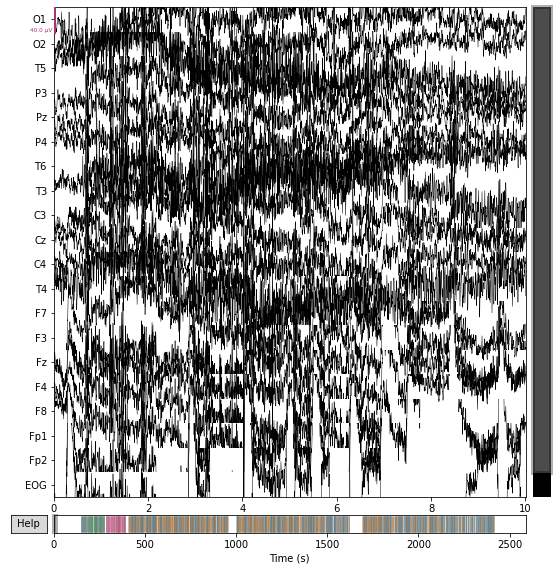

In [12]:
eeglab_raw.plot()

In [13]:
eventstarts = mne.events_from_annotations(eeglab_raw.copy())[0]

Used Annotations descriptions: ['Experiment', 'Experiment_END', 'Trial_3', 'Trial_3_END', 'Trial_4', 'Trial_4_END']


In [72]:
x = eventstarts[np.where(eventstarts[:,2] == 1)]
y = eventstarts[np.where(eventstarts[:,2] == 2)]
X = x[:,0]
Y = y[:,0]
z = np.concatenate([X, Y])


In [76]:
print(X[:2])
print(Y[0])
print(z[:2])

[104208 104835]
104576
[104208 104835]


In [78]:
np.reshape(z,(2,810))

array([[104208, 104835, 105339, ..., 616177, 616450, 616732],
       [104576, 105075, 105536, ..., 616187, 616455, 617859]])

In [20]:
path = r'../data/binary/S01.npy'
test = np.load(path)
test.shape

#SHAPE is:  n_Events x EEG channels x 256 samples(1s of signal)

(755, 19, 256)

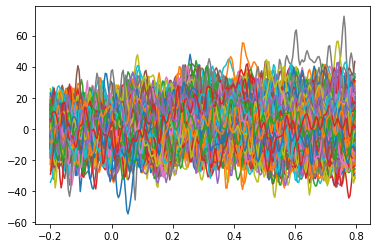

In [21]:
import matplotlib.pyplot as plt
t = np.arange(-0.2,0.8,1/256.0)

vect = test[:,0,:]

plt.plot(t,vect.T)
plt.show()

In [18]:
len(vect)

810

In [157]:
idx = []
for i in range(len(vect)):
    if np.max(np.abs(vect[i,:,:])) > 50:
        idx.append(i)
new_vect = np.delete(vect,idx,axis=0)

In [ ]:
new_vect

In [143]:
np.max(np.abs(vect[i,:]))

41.07416294648044

In [155]:
new_vect.shape

(789, 256)

In [158]:
new_vect.shape

(784, 2, 256)

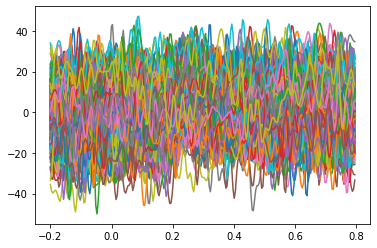

In [147]:
plt.plot(t, new_vect.T)
plt.show()

In [46]:
from PIL import Image

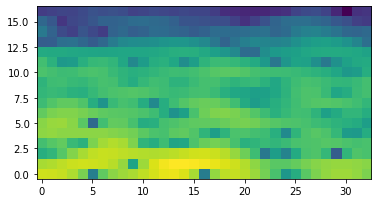

In [86]:
nfft = 64
x, y, z, img = plt.specgram(vect, NFFT=nfft, Fs=256, noverlap=nfft *0.91)

#plt.savefig('test.jpg', bbox_inches='tight', pad_inches=0)
img.get_array().shape
plt.imshow(np.log(x[:17,:]), origin='lower')

In [ ]:
freqs = np.linspace(0.1,30,1)

power = mne.time_frequency.tfr_morlet(mne.EvokedArray(vect,mne.create_info), freqs, 7)

In [56]:
u = Image.open('test.jpg')
data = np.asarray(u)

In [57]:
data.shape

(217, 334, 3)

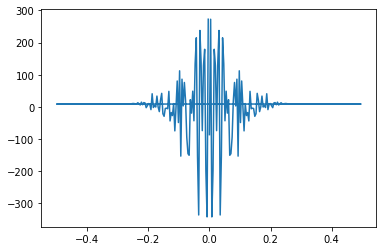

In [51]:
f_vect = np.fft.fft(vect)
freq = np.fft.fftfreq(t.shape[0])
plt.plot(freq, f_vect)
plt.show()